# Indepth Analysis

The data is wrangled and ready to be modelled. We will split the data into training set and train different models on it and test the model on the testing test. We will split the data set into 80% training and 20% testing data set. The data has 25% >50K class and 75% <=50k class. In order for the training and test set to have the same proportion of target variable in the split data, we set the parameter stratify to the target variable. We will model the data on different model and chose the model which performs the best.


For evaluating the performance of the model, we will use Confusion matrix and Area under the ROC curve.

<b>Confusion matrix</b> assess the accuracy of the predicted model. It gives the number of True positive, False Positive, False Negative, True Negative cases

    TN – True Negative
	FP – False Positive
	FN – False Negative
	TP – True Positive
	
    Accuracy = (TN+ TP)/(TN+FP+FN+TP)
    Precision = TP/(FP+TP)
    Sensitivity(Recall/TPR) = TP/(TP+FN)
    Specificity = TN/(TN+FP)
    False Positive Rate(FPR) = 1 - Specificity

<dd>Accuracy is the proportion of correct classifications from overall number of cases.</dd>
<dd>Precision gives proportion of correct positive classifications from cases that are predicted as positive.</dd>
<dd>Sensitivity or Recall gives the proportion of correct positive classifications from cases that are actually positive.</dd>
<dd>Specificity gives proportion of correct negative classification from cases that are actually negative.</dd>
<dd>F1 score = 2((Precision*Recall)/(Precision+Recall))</dd>
<dd>F1 score is needed when we seek a balance between Precision and Recall.</dd>

Ideal systems will have recall, precision as 1, which is impossible. 
    

<b>Area under the ROC </b>

ROC(Receiver Operating Characteristic) is the probability curve and the AUC(Area under the curve) gives the measure of separability. ROC plots TPR on Y-axis and FPR on X-axis. AUC denotes how well the model is distinguishing between classes. Higher the AUC, better the model is distinguishing between classes. A perfect model has AUC as 1 which means it is separating the classes perfectly. AUC close to 0 means model is not performing well.


#### How to model the data

I am going to model the data on Support Vector Machine and Random Forest Classifier and compare the performance of both. SVM algorithm is considered for relatively clean and less noisy data. Random Forest Classification Algorithm is useful when the dependent variables are mix of categorical and numeric values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc


col_names = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation', 
             'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native Country', 
             'Class']
df = pd.read_table("adult.dat", sep=",", header=None, na_values="?")
print("Numbers of rows in df - {}".format(len(df)))
#print(df.head(5))
df.columns = col_names

# Removing the Final Weight column since I don't have details about it
df = df.drop(["Fnlwgt"], axis = 1)

# Getting the number of NANs
n = df.isnull().sum()
print("List of NANs - {} ".format(n))

# Dropping NANs from df
df = df.dropna()
print("Numbers of rows in df after dropping null values - {}".format(len(df)))

#remove capital gain, capital loss
df = df.drop(["Capital-gain","Capital-loss"], axis=1)

Numbers of rows in df - 48842
List of NANs - Age                  0
Workclass         2799
Education            0
Education-num        0
Marital-status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native Country     857
Class                0
dtype: int64 
Numbers of rows in df after dropping null values - 45222


In [2]:
#Percentage of >50K class
len(df[df["Class"] == ">50K"])/len(df["Class"])

0.2478439697492371

In [3]:
#Percentage of <=50K class
len(df[df["Class"] == "<=50K"])/len(df["Class"])

0.7521560302507629

In [4]:
#Categorical features
#print(df.columns)
#print(df.info())
print("Number of unique entries in Workclass column is {} : \n {}".format(df["Workclass"].unique().size, df["Workclass"].unique()))
print("\nNumber of unique entries in Education column is {} : \n {}".format(df["Education"].unique().size, df["Education"].unique()))
print("\nNumber of unique entries in Marital status column is {} : \n {}".format(df["Marital-status"].unique().size, df["Marital-status"].unique()))
print("\nNumber of unique entries in Occupation column is {} : \n {} ".format(df["Occupation"].unique().size, df["Occupation"].unique()))
print("\nNumber of unique entries in Relationship column is {} : \n {}".format(df["Relationship"].unique().size, df["Relationship"].unique()))
print("\nNumber of unique entries in Race column is {} : \n {}".format(df["Race"].unique().size, df["Race"].unique()))
print("\nNumber of unique entries in Sex column is {} : \n {}".format(df["Sex"].unique().size, df["Sex"].unique()))
print("\nNumber of unique entries in Native Country column is {} : \n {}".format(df["Native Country"].unique().size, df["Native Country"].unique()))



Number of unique entries in Workclass column is 7 : 
 ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']

Number of unique entries in Education column is 16 : 
 ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']

Number of unique entries in Marital status column is 7 : 
 ['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']

Number of unique entries in Occupation column is 14 : 
 ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces'] 

Number of unique entries in Relationship column is 6 : 
 ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']

Number of uni

In [5]:
# Separate out the categorical features for encoding
# Encode the categorical features Workclass, Education, Marital Status, Occupation, relationship, Race, Sex, Native Country
X_cat = df.iloc[:, [1,2,4,5,6,7,10]].values
#print(X_cat) #,2,4,5,6,7,8,9
"""
Workclass - 7
Education - 16
Marital status - 7
Occupation - 14
Relationship - 6
Race - 5
Sex - 2
Native Country - 41
"""
# Encode the categorical features [Workclass, Education, Marital Status, Occupation, relationship, Race, Native Country]
labelencoder_X_0 = LabelEncoder()
X_cat[:, 0] = labelencoder_X_0.fit_transform(X_cat[:, 0]) #Workclass
labelencoder_X_1 = LabelEncoder()
X_cat[:, 1] = labelencoder_X_1.fit_transform(X_cat[:, 1]) #Education
labelencoder_X_2 = LabelEncoder()
X_cat[:, 2] = labelencoder_X_2.fit_transform(X_cat[:, 2]) #Marital-status
labelencoder_X_3 = LabelEncoder()
X_cat[:, 3] = labelencoder_X_3.fit_transform(X_cat[:, 3]) #Occupation
labelencoder_X_4 = LabelEncoder()
X_cat[:, 4] = labelencoder_X_4.fit_transform(X_cat[:, 4]) #Relationship
labelencoder_X_5 = LabelEncoder()
X_cat[:, 5] = labelencoder_X_5.fit_transform(X_cat[:, 5]) #Race
labelencoder_X_6 = LabelEncoder()
X_cat[:, 6] = labelencoder_X_6.fit_transform(X_cat[:,6]) #Native country
onehotencoder = OneHotEncoder(categorical_features = "all")
X_cat = onehotencoder.fit_transform(X_cat).toarray()

# Encode sex feature as binary value
labelencoder_X_7 = LabelEncoder()
X_race = df.iloc[:, 8].values
print(type(X_race))
X_race = labelencoder_X_7.fit_transform(X_race) #Sex
X_race = X_race.reshape((X_race.shape[0], 1))
X_cat = np.concatenate([X_cat, X_race], axis = 1)

# Separating out the numerical features for standardizing
X_num = df.iloc[:, [0, 3, 9]].values
#X_num = df.iloc[:, [3, 9]].values #to plot svm with 2 features

# Standardizing the numerical features
X_num = StandardScaler().fit_transform(X_num)
#print(X_num)

#Form the X and y 
X = np.concatenate([X_cat, X_num], axis = 1)
#X = X_num
y = df.iloc[:, 11].values # Class

# Encode the Class feature to binary value
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify=y)


<class 'numpy.ndarray'>


C:\SAnaconda\NewfolderForAnaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
# From scikit-learn.org
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Print Classification Report    
def print_classifn_report(y_test, y_pred, title):
    print("\nAccuracy score for test set {}\n".format(accuracy_score(y_test, y_pred)))
    print("Classification Report {}\n".format(title))
    print(classification_report(y_test, y_pred))

# Compute confusion matrix
def compute_plot_confusion_matrix(y_test, y_pred, title):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print(title)
    print(cnf_matrix)
    #print(confusion_matrix(y_test, y_pred))
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()    

# Support Vector Machine 

 An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

### Default parameters

In [7]:
#SVM Classifier

svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)


In [8]:
class_names = ["<=50k", ">50k"]

In [9]:
#print(svm_clf)


Confusion matrix for SVM Classifier with default value of gamma = 1

[[6343  460]
 [1094 1148]]


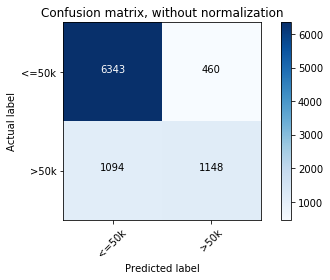

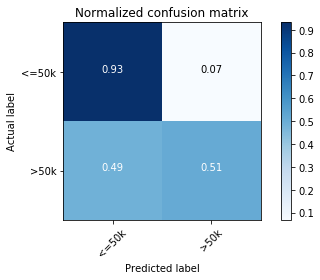

In [10]:
title="\nConfusion matrix for SVM Classifier with default value of gamma = 1\n"
compute_plot_confusion_matrix(y_test, y_pred, title)


<dl>
    <dt>Here -ve denotes the class <=50k, +ve denotes the class >50k</dt>
    <dt> </dt>
    <dt> From the confusion matrix, we learn that out of 9045 samples, </dt>
        <dd> 6343 samples were True negatives meaning those samples were classified as <=50k and they actually belong to <=50k class</dd>
        <dd> 1148 samples were True positives meaning those samples were classified as >50k and they actually belong to >50k class</dd>
    <dd> 1094 samples were False negatives meaning those samples were classified as <=50k but they actually belong to >50k class</dd>
    <dd> 460  samples were False positives meaning those samples were classified as >50k but they actually belong to <=50k class</dd>
</dl>


In [11]:
title="For SVM Classifier with default value of gamma = 1"
print_classifn_report(y_test, y_pred, title)


Accuracy score for test set 0.8281923714759536

Classification Report For SVM Classifier with default value of gamma = 1

             precision    recall  f1-score   support

          0       0.85      0.93      0.89      6803
          1       0.71      0.51      0.60      2242

avg / total       0.82      0.83      0.82      9045



From the classification report, we learn that 82.8% of the test data was correctly classified  

### Hyper tuning the parameters for SVM Algorithm

We will tune the parameter C (regularization parameter) and gamma and check the performace of the model.

The C parameter tells SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

The gamma parameter defines how far the influence of a single training example reaches, with low values meaning far and high values meaning close. With low gamma value, points far away from plausible seperation line are considered in calculation for the seperation line. Where as high gamma value means the points close to plausible line are considered in calculation.

The best parameters obtained through GridSearchCV are Gamma=0.1, C=1.
The performance with optimum parameters is shown below

### Support Vector Machine With Gamma = 0.1

In [12]:
svm_clf = svm.SVC(gamma=0.1, C=1)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)


 Confusion matrix for SVM Classifier with optimum value for gamma=0.1

[[6242  561]
 [ 964 1278]]


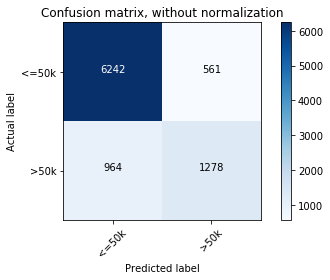

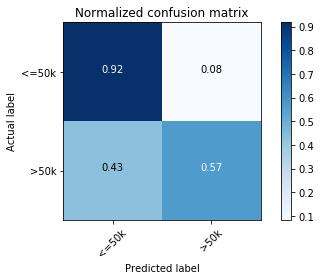

In [13]:
title="\n Confusion matrix for SVM Classifier with optimum value for gamma=0.1\n"
compute_plot_confusion_matrix(y_test, y_pred, title)

In [14]:
title="For SVM Classifier with optimum value for gamma=0.1"
print_classifn_report(y_test, y_pred, title)


Accuracy score for test set 0.8313985627418463

Classification Report For SVM Classifier with optimum value for gamma=0.1

             precision    recall  f1-score   support

          0       0.87      0.92      0.89      6803
          1       0.69      0.57      0.63      2242

avg / total       0.82      0.83      0.83      9045



<dd>
92% of the Class 0(<=50k)  is classified as Class 0(<=50k). 
</dd>
<dd>
Only 57% of the Class 1(>50k) is classified as Class 1(>50k). Performance of the model on classifying Class 1(>50k) is lower than it's performance classifying Class 0(<=50k).
</dd>
<dd>
When Class 0(<=50k) is classified as Class 0(<=50k), it is correct 87% of the time. Which also means Class 1(>50k) is wrongly classified as Class 0(<=50k) 13% of the time 
</dd>
<dd>When Class 1(>50k) is classified as Class 1(>50k), it is correct 69% of the time. Which also means Class 0(<=50k) is wrongly classified as Class 1(>50k) 31% of the time 
</dd>

<b>
<dd>With optimal parameter values of gamma = 0.1 and C = 1, we can see slight improvement of accuracy score of 83.13% when compared to basemodel performance with accuracy score of 82.6% </dd>
 </b>   

## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)



 Confusion matrix for Random Forest Classifier with default parameters

[[6119  684]
 [1062 1180]]


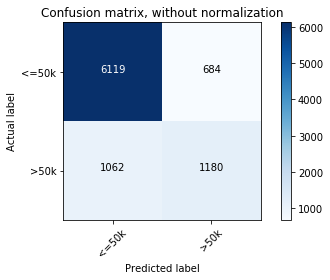

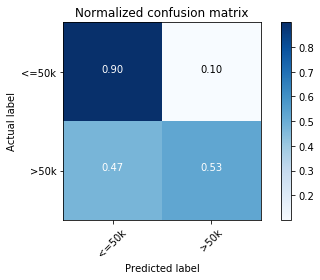

In [16]:
title="\n Confusion matrix for Random Forest Classifier with default parameters\n"
compute_plot_confusion_matrix(y_test, y_pred, title)

In [17]:
title="For Random Forest Classifier with default parameters"
print_classifn_report(y_test, y_pred, title)


Accuracy score for test set 0.8069651741293532

Classification Report For Random Forest Classifier with default parameters

             precision    recall  f1-score   support

          0       0.85      0.90      0.88      6803
          1       0.63      0.53      0.57      2242

avg / total       0.80      0.81      0.80      9045



# GridSearchCV

The Random Forest Classifier's parameters can be tuned to increase the predicting power of the model. Some of the features that I have picked to tune here are max_features, n_estimators, min_sample_leaf.

#### max_features
This is the maximum number of features the algorithn is allowed to try in an individual tree. Increasing the max_features improves the performance of the model as there are more options to be considered at each node. But this decreases the speed of the algorithm. Optimum number of features should be chosen to balance the performance and speed of the model

#### n_estimators
This is the maximum number of trees that can be formed by the model before taking the vote. Higher the number of trees, better the predicting power. Again this comes at the cost of the speed.

#### min_sample_leaf
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches

#### min_samples_split
The minimum number of samples required to split an internal node.

I am going to find the best params values for the above parameters by GridSearchCV.

In [18]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3, 4, 5, None],
    'max_features': [4, 6, 11],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 500]
}


# Instantiate the grid search model
rf_clf = RandomForestClassifier()
grid_search_model = GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                          cv = 3, verbose = 6)
# Fit the grid search to the data
grid_search_model.fit(X_train, y_train)
print(grid_search_model.best_params_)
best_grid = grid_search_model.best_estimator_


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.7521558872305141, total=   0.8s
[CV] max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.7521353346048595, total=   0.8s
[CV] max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100, score=0.7521977110631946, total=   0.8s
[CV] max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, score=0.7521558872305141, total=   1.6s
[CV] max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.5s remaining:    0.0s


[CV]  max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, score=0.7521353346048595, total=   1.8s
[CV] max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.0s remaining:    0.0s


[CV]  max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=200, score=0.7521977110631946, total=   1.8s
[CV] max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.7521558872305141, total=   4.2s
[CV] max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.7521353346048595, total=   4.6s
[CV] max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.7521977110631946, total=   4.5s
[CV] max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  max_depth=3, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=1

[CV]  max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.7521977110631946, total=   1.7s
[CV] max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.7521558872305141, total=   4.2s
[CV] max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.7521353346048595, total=   4.2s
[CV] max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.7521977110631946, total=   4.2s
[CV] max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=12, n_estim

[CV]  max_depth=3, max_features=4, min_samples_leaf=5, min_samples_split=12, n_estimators=200, score=0.7521977110631946, total=   1.7s
[CV] max_depth=3, max_features=4, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  max_depth=3, max_features=4, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.7521558872305141, total=   4.2s
[CV] max_depth=3, max_features=4, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  max_depth=3, max_features=4, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.7521353346048595, total=   4.2s
[CV] max_depth=3, max_features=4, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  max_depth=3, max_features=4, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.7521977110631946, total=   4.2s
[CV] max_depth=3, max_features=6, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  max_depth=3, max_features=6, min_samples_leaf=3, min_samples_split=8, n_estimat

[CV]  max_depth=3, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=200, score=0.7521977110631946, total=   1.9s
[CV] max_depth=3, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=500 
[CV]  max_depth=3, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=500, score=0.7521558872305141, total=   4.9s
[CV] max_depth=3, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=500 
[CV]  max_depth=3, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=500, score=0.7521353346048595, total=   4.9s
[CV] max_depth=3, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=500 
[CV]  max_depth=3, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=500, score=0.7521977110631946, total=   4.9s
[CV] max_depth=3, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=3, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=1

[CV]  max_depth=3, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=0.7521977110631946, total=   1.9s
[CV] max_depth=3, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=3, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.7531509121061359, total=   4.9s
[CV] max_depth=3, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=3, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.7521353346048595, total=   4.9s
[CV] max_depth=3, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=3, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.7521977110631946, total=   4.9s
[CV] max_depth=3, max_features=6, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  max_depth=3, max_features=6, min_samples_leaf=5, min_samples_split=12, n_estim

[CV]  max_depth=3, max_features=11, min_samples_leaf=3, min_samples_split=12, n_estimators=200, score=0.8060208989882236, total=   2.7s
[CV] max_depth=3, max_features=11, min_samples_leaf=3, min_samples_split=12, n_estimators=500 
[CV]  max_depth=3, max_features=11, min_samples_leaf=3, min_samples_split=12, n_estimators=500, score=0.7883913764510779, total=   7.1s
[CV] max_depth=3, max_features=11, min_samples_leaf=3, min_samples_split=12, n_estimators=500 
[CV]  max_depth=3, max_features=11, min_samples_leaf=3, min_samples_split=12, n_estimators=500, score=0.797910274483788, total=   6.6s
[CV] max_depth=3, max_features=11, min_samples_leaf=3, min_samples_split=12, n_estimators=500 
[CV]  max_depth=3, max_features=11, min_samples_leaf=3, min_samples_split=12, n_estimators=500, score=0.7940786200033173, total=   6.6s
[CV] max_depth=3, max_features=11, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=3, max_features=11, min_samples_leaf=4, min_samples_split=8, n

[CV]  max_depth=3, max_features=11, min_samples_leaf=5, min_samples_split=8, n_estimators=200, score=0.7885221429756178, total=   2.6s
[CV] max_depth=3, max_features=11, min_samples_leaf=5, min_samples_split=8, n_estimators=500 
[CV]  max_depth=3, max_features=11, min_samples_leaf=5, min_samples_split=8, n_estimators=500, score=0.7906301824212272, total=   6.6s
[CV] max_depth=3, max_features=11, min_samples_leaf=5, min_samples_split=8, n_estimators=500 
[CV]  max_depth=3, max_features=11, min_samples_leaf=5, min_samples_split=8, n_estimators=500, score=0.7971639439422837, total=   6.6s
[CV] max_depth=3, max_features=11, min_samples_leaf=5, min_samples_split=8, n_estimators=500 
[CV]  max_depth=3, max_features=11, min_samples_leaf=5, min_samples_split=8, n_estimators=500, score=0.7957372698623321, total=   6.7s
[CV] max_depth=3, max_features=11, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=3, max_features=11, min_samples_leaf=5, min_samples_split=10, n_est

[CV]  max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=200, score=0.7521977110631946, total=   1.9s
[CV] max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.7521558872305141, total=   4.8s
[CV] max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.7521353346048595, total=   5.3s
[CV] max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.7535246309504063, total=   4.7s
[CV] max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  max_depth=4, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estim

[CV]  max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=12, n_estimators=200, score=0.7521977110631946, total=   2.1s
[CV] max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=12, n_estimators=500 
[CV]  max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.7532338308457711, total=   5.9s
[CV] max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=12, n_estimators=500 
[CV]  max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.7522182602205821, total=   4.8s
[CV] max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=12, n_estimators=500 
[CV]  max_depth=4, max_features=4, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.7536075634433571, total=   4.8s
[CV] max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  max_depth=4, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimat

[CV]  max_depth=4, max_features=6, min_samples_leaf=3, min_samples_split=8, n_estimators=200, score=0.785619505722342, total=   2.3s
[CV] max_depth=4, max_features=6, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  max_depth=4, max_features=6, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.7771973466003317, total=   5.9s
[CV] max_depth=4, max_features=6, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  max_depth=4, max_features=6, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.7800812671034082, total=   6.0s
[CV] max_depth=4, max_features=6, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  max_depth=4, max_features=6, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.775501741582352, total=   5.8s
[CV] max_depth=4, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  max_depth=4, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=100

[CV]  max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.7711892519489136, total=   2.4s
[CV] max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.7753731343283582, total=   6.6s
[CV] max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.7846421759681566, total=   7.9s
[CV] max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.7765798639907115, total=   7.7s
[CV] max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  max_depth=4, max_features=6, min_samples_leaf=4, min_samples_split=12, n_estim

[CV]  max_depth=4, max_features=6, min_samples_leaf=5, min_samples_split=12, n_estimators=200, score=0.7822192735113618, total=   2.3s
[CV] max_depth=4, max_features=6, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  max_depth=4, max_features=6, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.7775290215588723, total=   6.8s
[CV] max_depth=4, max_features=6, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  max_depth=4, max_features=6, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.7787544572518451, total=   6.6s
[CV] max_depth=4, max_features=6, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  max_depth=4, max_features=6, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.7819704760325096, total=   5.7s
[CV] max_depth=4, max_features=11, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  max_depth=4, max_features=11, min_samples_leaf=3, min_samples_split=8, n_estim

[CV]  max_depth=4, max_features=11, min_samples_leaf=4, min_samples_split=8, n_estimators=200, score=0.8092552662133023, total=   3.2s
[CV] max_depth=4, max_features=11, min_samples_leaf=4, min_samples_split=8, n_estimators=500 
[CV]  max_depth=4, max_features=11, min_samples_leaf=4, min_samples_split=8, n_estimators=500, score=0.8115257048092869, total=   7.9s
[CV] max_depth=4, max_features=11, min_samples_leaf=4, min_samples_split=8, n_estimators=500 
[CV]  max_depth=4, max_features=11, min_samples_leaf=4, min_samples_split=8, n_estimators=500, score=0.8092710838377974, total=   8.3s
[CV] max_depth=4, max_features=11, min_samples_leaf=4, min_samples_split=8, n_estimators=500 
[CV]  max_depth=4, max_features=11, min_samples_leaf=4, min_samples_split=8, n_estimators=500, score=0.8143141482832974, total=   7.9s
[CV] max_depth=4, max_features=11, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=4, max_features=11, min_samples_leaf=4, min_samples_split=10, n_est

[CV]  max_depth=4, max_features=11, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=0.8128213634101841, total=   3.2s
[CV] max_depth=4, max_features=11, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=4, max_features=11, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.8129353233830846, total=   8.2s
[CV] max_depth=4, max_features=11, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=4, max_features=11, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.8091052326063521, total=   9.0s
[CV] max_depth=4, max_features=11, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=4, max_features=11, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.8137336208326422, total=   8.4s
[CV] max_depth=4, max_features=11, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  max_depth=4, max_features=11, min_samples_leaf=5, min_samples_split=12

[CV]  max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=200, score=0.7568419306684359, total=   2.2s
[CV] max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=500 
[CV]  max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=500, score=0.7627694859038142, total=   5.9s
[CV] max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=500 
[CV]  max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=500, score=0.7602620449456837, total=   5.5s
[CV] max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=500 
[CV]  max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=500, score=0.7564272682036822, total=   5.4s
[CV] max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=5, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimat

[CV]  max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, score=0.7677890197379333, total=   3.0s
[CV] max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500 
[CV]  max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500, score=0.760530679933665, total=   6.7s
[CV] max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500 
[CV]  max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500, score=0.7628327390330873, total=   5.7s
[CV] max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500 
[CV]  max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500, score=0.7580029855697462, total=   5.3s
[CV] max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=10

[CV]  max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=200, score=0.8047769115939625, total=   2.7s
[CV] max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.8066334991708126, total=   6.4s
[CV] max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.8039638444315449, total=   6.4s
[CV] max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=500, score=0.808094211311992, total=   6.8s
[CV] max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  max_depth=5, max_features=6, min_samples_leaf=3, min_samples_split=12, n_estima

[CV]  max_depth=5, max_features=6, min_samples_leaf=4, min_samples_split=12, n_estimators=200, score=0.807181953889534, total=   2.9s
[CV] max_depth=5, max_features=6, min_samples_leaf=4, min_samples_split=12, n_estimators=500 
[CV]  max_depth=5, max_features=6, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.8060530679933665, total=   6.5s
[CV] max_depth=5, max_features=6, min_samples_leaf=4, min_samples_split=12, n_estimators=500 
[CV]  max_depth=5, max_features=6, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.802554108964259, total=   7.8s
[CV] max_depth=5, max_features=6, min_samples_leaf=4, min_samples_split=12, n_estimators=500 
[CV]  max_depth=5, max_features=6, min_samples_leaf=4, min_samples_split=12, n_estimators=500, score=0.8018742743406867, total=   8.8s
[CV] max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  max_depth=5, max_features=6, min_samples_leaf=5, min_samples_split=8, n_estimator

[CV]  max_depth=5, max_features=11, min_samples_leaf=3, min_samples_split=8, n_estimators=200, score=0.8183778404378835, total=   3.6s
[CV] max_depth=5, max_features=11, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  max_depth=5, max_features=11, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.8185737976782753, total=   9.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  max_depth=5, max_features=11, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.8139149183182686, total=   9.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  max_depth=5, max_features=11, min_samples_leaf=3, min_samples_split=8, n_estimators=500, score=0.8188754353955879, total=  10.0s
[CV] max_depth=5, max_features=11, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, max_features=11, min_samples_leaf=3, min_samples_split=10, n_est

[CV]  max_depth=5, max_features=11, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.8184607729308343, total=   3.6s
[CV] max_depth=5, max_features=11, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=11, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.8183250414593698, total=   9.1s
[CV] max_depth=5, max_features=11, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=11, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.8122564060038145, total=   9.1s
[CV] max_depth=5, max_features=11, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=11, min_samples_leaf=4, min_samples_split=10, n_estimators=500, score=0.8193730303532925, total=   9.2s
[CV] max_depth=5, max_features=11, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  max_depth=5, max_features=11, min_samples_leaf=4, min_samples_split=12

[CV]  max_depth=5, max_features=11, min_samples_leaf=5, min_samples_split=12, n_estimators=200, score=0.8184607729308343, total=   3.7s
[CV] max_depth=5, max_features=11, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  max_depth=5, max_features=11, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.818407960199005, total=  10.2s
[CV] max_depth=5, max_features=11, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  max_depth=5, max_features=11, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.8125051828509827, total=  14.4s
[CV] max_depth=5, max_features=11, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  max_depth=5, max_features=11, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.8199535578039476, total=   9.4s
[CV] max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  max_depth=None, max_features=4, min_samples_leaf=3, min_samples_split=

[CV]  max_depth=None, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=200, score=0.831232376845248, total=   5.2s
[CV] max_depth=None, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=500 
[CV]  max_depth=None, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=500, score=0.8281923714759536, total=  12.8s
[CV] max_depth=None, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=500 
[CV]  max_depth=None, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=500, score=0.82195870304337, total=   9.3s
[CV] max_depth=None, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=500 
[CV]  max_depth=None, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=500, score=0.8297395919721346, total=   9.4s
[CV] max_depth=None, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  max_depth=None, max_features=4, min_samples_leaf=4, min_samples_

[CV]  max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=0.8215440749647566, total=   3.5s
[CV] max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=0.8279980096201692, total=   4.0s
[CV] max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.8277777777777777, total=   8.8s
[CV] max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=500, score=0.8207977444232524, total=   9.6s
[CV] max_depth=None, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  max_depth=None, max_features=4, min_samples_leaf=5, mi

[CV]  max_depth=None, max_features=6, min_samples_leaf=3, min_samples_split=12, n_estimators=200, score=0.8334991708126036, total=   4.9s
[CV] max_depth=None, max_features=6, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  max_depth=None, max_features=6, min_samples_leaf=3, min_samples_split=12, n_estimators=200, score=0.8280951986068497, total=   4.9s
[CV] max_depth=None, max_features=6, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  max_depth=None, max_features=6, min_samples_leaf=3, min_samples_split=12, n_estimators=200, score=0.8365400563940952, total=   5.0s
[CV] max_depth=None, max_features=6, min_samples_leaf=3, min_samples_split=12, n_estimators=500 
[CV]  max_depth=None, max_features=6, min_samples_leaf=3, min_samples_split=12, n_estimators=500, score=0.8344112769485904, total=  12.5s
[CV] max_depth=None, max_features=6, min_samples_leaf=3, min_samples_split=12, n_estimators=500 
[CV]  max_depth=None, max_features=6, min_samples_leaf=3, mi

[CV]  max_depth=None, max_features=6, min_samples_leaf=5, min_samples_split=8, n_estimators=100, score=0.8341350140985238, total=   2.3s
[CV] max_depth=None, max_features=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  max_depth=None, max_features=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, score=0.8312603648424544, total=   4.4s
[CV] max_depth=None, max_features=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  max_depth=None, max_features=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, score=0.8267683887552865, total=   5.2s
[CV] max_depth=None, max_features=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  max_depth=None, max_features=6, min_samples_leaf=5, min_samples_split=8, n_estimators=200, score=0.8353790014927849, total=   4.9s
[CV] max_depth=None, max_features=6, min_samples_leaf=5, min_samples_split=8, n_estimators=500 
[CV]  max_depth=None, max_features=6, min_samples_leaf=5, min_sample

[CV]  max_depth=None, max_features=11, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.8319097769300937, total=   3.5s
[CV] max_depth=None, max_features=11, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  max_depth=None, max_features=11, min_samples_leaf=3, min_samples_split=10, n_estimators=100, score=0.8395256261403218, total=   3.4s
[CV] max_depth=None, max_features=11, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=11, min_samples_leaf=3, min_samples_split=10, n_estimators=200, score=0.839469320066335, total=   6.9s
[CV] max_depth=None, max_features=11, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=11, min_samples_leaf=3, min_samples_split=10, n_estimators=200, score=0.8318268513143711, total=   6.9s
[CV] max_depth=None, max_features=11, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  max_depth=None, max_features=11, min_samples_le

[CV]  max_depth=None, max_features=11, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.8379767827529021, total=   4.6s
[CV] max_depth=None, max_features=11, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  max_depth=None, max_features=11, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.8303341902313625, total=   4.6s
[CV] max_depth=None, max_features=11, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  max_depth=None, max_features=11, min_samples_leaf=4, min_samples_split=12, n_estimators=100, score=0.8399402886050754, total=   4.6s
[CV] max_depth=None, max_features=11, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  max_depth=None, max_features=11, min_samples_leaf=4, min_samples_split=12, n_estimators=200, score=0.839469320066335, total=   7.0s
[CV] max_depth=None, max_features=11, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  max_depth=None, max_features=11, min_samples_le

[CV]  max_depth=None, max_features=11, min_samples_leaf=5, min_samples_split=12, n_estimators=500, score=0.8377840437883562, total=  19.2s


[Parallel(n_jobs=1)]: Done 972 out of 972 | elapsed: 85.0min finished


{'max_depth': None, 'max_features': 11, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}


In [19]:
best_grid_model = best_grid.fit(X_train, y_train)
y_pred = best_grid.predict(X_test)
probas_ = best_grid_model.predict_proba(X_test)



 Confusion matrix for Random Forest Classifier with default parameters

[[6262  541]
 [ 959 1283]]


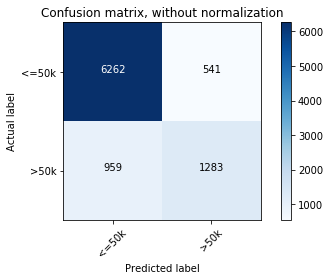

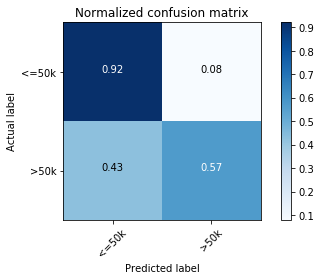

In [20]:
title="\n Confusion matrix for Random Forest Classifier with default parameters\n"
compute_plot_confusion_matrix(y_test, y_pred, title)

In [21]:
title="For Random Forest Classifier with best params"
print_classifn_report(y_test, y_pred,title)


Accuracy score for test set 0.8341625207296849

Classification Report For Random Forest Classifier with best params

             precision    recall  f1-score   support

          0       0.87      0.92      0.89      6803
          1       0.70      0.57      0.63      2242

avg / total       0.83      0.83      0.83      9045



Random Forest Classifier with best params is performing better with 3.4% increase in accuracy as opposed to the Random Forest model with default parameters with accuracy rate of 80%



### Comparsion between SVM best model and Random Forest best model

#### SVM with best param is performing at accuracy rate of 83.13% and Random Forest with best params is performing at accuracy rate of 83.4% showing Random Forest is slightly better. 

#### We can further evaluate both the models by plotting ROC and comparing the Area under the ROC. The model with higher AUC is considered better.
